In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


Data Visualization

In [74]:
df = pd.read_csv('../data/raw/student_perfomance.csv')  
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [77]:
# Basic info
df.info()
# Check for null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [78]:
# Check unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


StudentID: [1001 1002 1003 ... 3390 3391 3392]
Age: [17 18 15 16]
Gender: [1 0]
Ethnicity: [0 2 1 3]
ParentalEducation: [2 1 3 4 0]
StudyTimeWeekly: [19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]
Absences: [ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]
Tutoring: [1 0]
ParentalSupport: [2 1 3 4 0]
Extracurricular: [0 1]
Sports: [0 1]
Music: [1 0]
Volunteering: [0 1]
GPA: [2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388]
GradeClass: [2. 1. 4. 3. 0.]


In [82]:
print(df.columns.tolist())


['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']


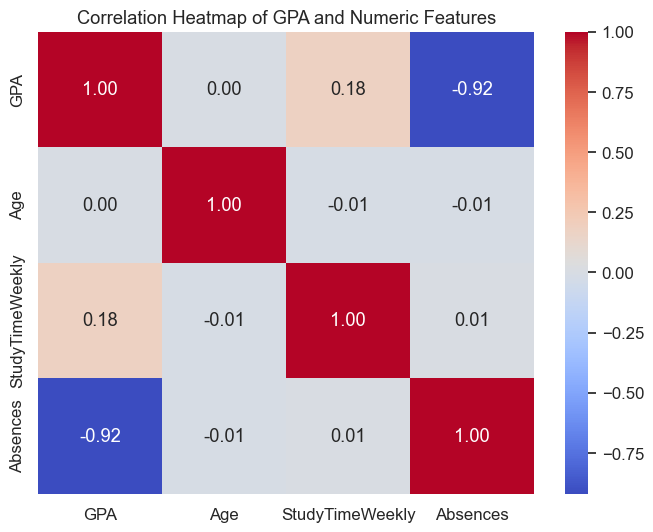

In [83]:
# Show numerical correlation (target: GPA)
numeric_df = df[['GPA', 'Age', 'StudyTimeWeekly', 'Absences']]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of GPA and Numeric Features")
plt.show()


Although GPA is not used in Rwandan schools, in this dataset it serves as a proxy for overall academic performance. We assume that students with higher GPA in this dataset would similarly perform well in STEM subjects in the Rwandan context, and use this score to guide subject selection.


In [92]:
# Rename column
df = df.rename(columns={'GPA': 'AcademicPotential'})


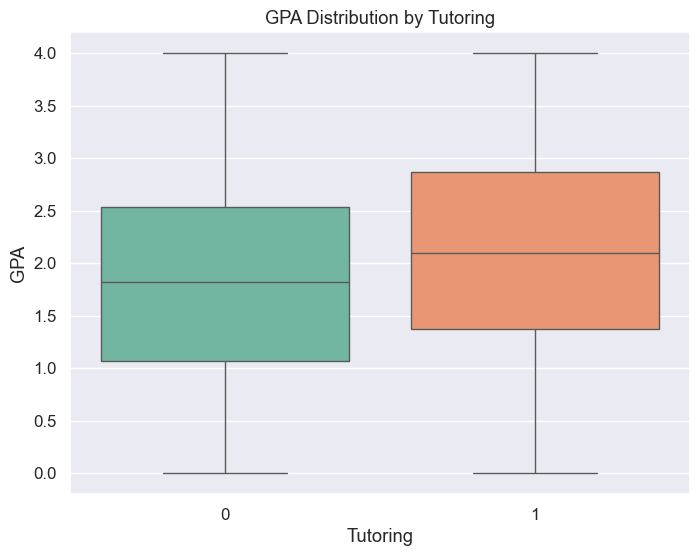

In [93]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Tutoring', y='AcademicPotential', palette='Set2')
plt.title("GPA Distribution by Tutoring")
plt.xlabel("Tutoring")
plt.ylabel("GPA")
plt.show()


In [94]:
from sklearn.preprocessing import StandardScaler

# 1. Rename GPA for clarity
df = df.rename(columns={'GPA': 'AcademicPotential'})

# 2. One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Standardize numerical columns
scaler = StandardScaler()
numeric_columns = ['Age', 'StudyTimeWeekly', 'Absences']

df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])


In [95]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('AcademicPotential', axis=1)
y = df_encoded['AcademicPotential']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")


Train shape: (1913, 14)
Test shape: (479, 14)


In [97]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Re-create and train the model
lr_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', random_state=42)
lr_model.fit(X_train, y_train)

# Optional: see performance again
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Linear Regression MSE - Train: {train_mse:.4f}, Test: {test_mse:.4f}")


Linear Regression MSE - Train: 352400922384178966230131015680.0000, Test: 355158082345380922930193498112.0000


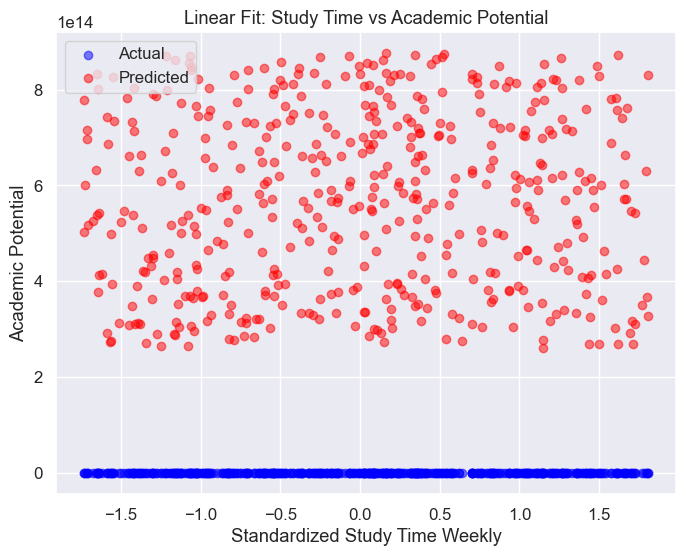

In [98]:
# Plot predicted vs actual using StudyTimeWeekly
feature = 'StudyTimeWeekly'

X_feature = X_test[feature]
y_actual = y_test
y_pred = lr_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_feature, y_actual, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_feature, y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Linear Fit: Study Time vs Academic Potential')
plt.xlabel('Standardized Study Time Weekly')
plt.ylabel('Academic Potential')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

# Linear Regression
lr_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)

# Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)

# Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)

# Show comparison
print(f"Linear Regression MSE: {lr_mse:.4f}")
print(f"Decision Tree MSE:     {tree_mse:.4f}")
print(f"Random Forest MSE:     {forest_mse:.4f}")


Linear Regression MSE: 355158082345380922930193498112.0000
Decision Tree MSE:     0.0877
Random Forest MSE:     0.0517


In [106]:
import os

# Select best model
models = {
    'linear_regression': (lr_model, lr_mse),
    'decision_tree': (tree_model, tree_mse),
    'random_forest': (forest_model, forest_mse)
}

# Get model with the least MSE
best_model_name, (best_model, best_mse) = min(models.items(), key=lambda x: x[1][1])
print(f"Best model: {best_model_name} with MSE: {best_mse:.4f}")

# Create 'models' directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the best model inside models/
joblib.dump(best_model, "../models/best_model.pkl")
print("Saved best model to models/best_model.pkl")


Best model: random_forest with MSE: 0.0517
Saved best model to models/best_model.pkl


In [103]:
sample = X_test.iloc[0].values.reshape(1, -1)
predicted_value = best_model.predict(sample)[0]
print(f"Prediction for one data point: {predicted_value:.2f}")


Prediction for one data point: 1.38
